# Modely s 10 črtami

In [52]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = "finalne_data.csv"
df_final = pd.read_csv(data)
df_final.dropna(inplace = True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44053 entries, 0 to 44052
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                44053 non-null  object
 1   text                 44053 non-null  object
 2   subject              44053 non-null  object
 3   text_length          44053 non-null  int64 
 4   label                44053 non-null  object
 5   title_stem           44053 non-null  object
 6   title_lemm           44053 non-null  object
 7   text_stem            44053 non-null  object
 8   text_lemm            44053 non-null  object
 9   title_text           44053 non-null  object
 10  title_text_stem      44053 non-null  object
 11  title_text_lemm      44053 non-null  object
 12  title_hypernym       44053 non-null  object
 13  text_hypernym        44053 non-null  object
 14  title_text_hypernym  44053 non-null  object
dtypes: int64(1), object(14)
memory usage: 5.0+ MB


## Modelovanie a rôzne výsledky

## Pomocou CountVectorizer

In [5]:
def count_vect_model(data, stopword):
    if stopword == 1:                                 
        vectorizer = CountVectorizer(max_features = 10, stop_words=stopwords.words('english'))
    elif stopword == 0:
        vectorizer = CountVectorizer(max_features = 10)
    
    X = vectorizer.fit_transform(data)
    y = df_final.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    print("Training score:", clf.score(X_train, y_train))
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision: %f" % metrics.precision_score(y_test, y_pred, average="macro"))
    print("Recall: %f\n" % metrics.recall_score(y_test, y_pred, average="macro"))
    
    features = vectorizer.get_feature_names()
    feature_importance = clf.feature_importances_
    for i,v in enumerate(feature_importance):
        print("Feature: " + features[i] + " | Score: " + str(v))

In [14]:
# Použitie bi-gramov
def count_vect_model_2gram(data, stopword):
    if stopword == 1:
        vectorizer = CountVectorizer(max_features = 10, stop_words=stopwords.words('english'), ngram_range = (2, 2))
    elif stopword == 0:
        vectorizer = CountVectorizer(max_features = 10, ngram_range = (2, 2))
    
    X = vectorizer.fit_transform(data)
    y = df_final.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    print("Training score:", clf.score(X_train, y_train))
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision: %f" % metrics.precision_score(y_test, y_pred, average="macro"))
    print("Recall: %f\n" % metrics.recall_score(y_test, y_pred, average="macro"))
    
    features = vectorizer.get_feature_names()
    feature_importance = clf.feature_importances_
    for i,v in enumerate(feature_importance):
        print("Feature: " + features[i] + " | Score: " + str(v))

In [15]:
# Použitie tri-gramov
def count_vect_model_3gram(data, stopword):
    if stopword == 1:
        vectorizer = CountVectorizer(max_features = 10, stop_words=stopwords.words('english'), ngram_range = (3, 3))
    elif stopword == 0:
        vectorizer = CountVectorizer(max_features = 10, ngram_range = (3, 3))
    
    X = vectorizer.fit_transform(data)
    y = df_final.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    print("Training score:", clf.score(X_train, y_train))
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision: %f" % metrics.precision_score(y_test, y_pred, average="macro"))
    print("Recall: %f\n" % metrics.recall_score(y_test, y_pred, average="macro"))
    
    features = vectorizer.get_feature_names()
    feature_importance = clf.feature_importances_
    for i,v in enumerate(feature_importance):
        print("Feature: " + features[i] + " | Score: " + str(v))

### Title

In [35]:
count_vect_model(df_final.title, 1)

Training score: 0.7381678527052976
Accuracy: 0.7488140953241473
Precision: 0.809826
Recall: 0.754289

Feature: clinton | Score: 0.009290501510937231
Feature: hillary | Score: 0.10063810574854745
Feature: house | Score: 0.02074700224708131
Feature: new | Score: 0.0013371970003262762
Feature: obama | Score: 0.05045830316139546
Feature: says | Score: 0.08113108730813544
Feature: trump | Score: 0.047455555880848134
Feature: video | Score: 0.5575199758259866
Feature: watch | Score: 0.11027207288104691
Feature: white | Score: 0.021150198435695374


In [11]:
count_vect_model_2gram(df_final.title, 1)

Training score: 0.5518415526928098
Accuracy: 0.5486323913290205
Precision: 0.655709
Recall: 0.533753

Feature: anti trump | Score: 0.04288990566769726
Feature: donald trump | Score: 0.1976684163227523
Feature: fox news | Score: 0.0782218587285834
Feature: hillary clinton | Score: 0.08687860032675203
Feature: north korea | Score: 0.2140966917199622
Feature: president trump | Score: 0.14563299150563055
Feature: supreme court | Score: 0.007326563851511793
Feature: trump says | Score: 0.09162791777114276
Feature: trump video | Score: 0.06604930488098922
Feature: white house | Score: 0.06960774922497848


In [12]:
count_vect_model_3gram(df_final.title, 1)

Training score: 0.5265875943476533
Accuracy: 0.5253660197480422
Precision: 0.742134
Recall: 0.508832

Feature: black lives matter | Score: 0.2288030524064893
Feature: boiler room ep | Score: 0.18961266257259698
Feature: donald trump jr | Score: 0.028246894581583894
Feature: factbox trump twitter | Score: 0.12089396553022788
Feature: house speaker ryan | Score: 0.11915759572061982
Feature: iran nuclear deal | Score: 0.1163854642916026
Feature: new york times | Score: 0.01537691589215509
Feature: supreme court justice | Score: 0.02443039261491341
Feature: trump travel ban | Score: 0.04558892696480477
Feature: white house says | Score: 0.11150412942500616


In [37]:
count_vect_model(df_final.title_stem, 0)

Training score: 0.7365582288489777
Accuracy: 0.7470070024847526
Precision: 0.803662
Recall: 0.752328

Feature: clinton | Score: 0.009160289592141508
Feature: hillari | Score: 0.10243893972114027
Feature: hous | Score: 0.020112371619976623
Feature: obama | Score: 0.05165293418130728
Feature: presid | Score: 0.008263541094625538
Feature: republican | Score: 0.004154085384173552
Feature: say | Score: 0.07416305003437201
Feature: trump | Score: 0.04789884088099119
Feature: video | Score: 0.5701483498977571
Feature: watch | Score: 0.11200759759351486


In [16]:
count_vect_model_2gram(df_final.title_stem, 0)

Training score: 0.5515010498836616
Accuracy: 0.5487458858245375
Precision: 0.655961
Recall: 0.533870

Feature: anti trump | Score: 0.03706166167918096
Feature: donald trump | Score: 0.19152868419698735
Feature: fox news | Score: 0.07639087876200913
Feature: hillari clinton | Score: 0.0866634454317934
Feature: north korea | Score: 0.20743202863180818
Feature: presid trump | Score: 0.14154003429659973
Feature: suprem court | Score: 0.006994635142480508
Feature: trump say | Score: 0.0743705476907856
Feature: trump support | Score: 0.11087803174754116
Feature: white hous | Score: 0.06714005242081403


In [17]:
count_vect_model_3gram(df_final.title_stem, 0)

Training score: 0.5265592191135577
Accuracy: 0.5254795142435592
Precision: 0.742390
Recall: 0.508949

Feature: anti trump protest | Score: 0.045292715116144015
Feature: black live matter | Score: 0.2257196325297049
Feature: boiler room ep | Score: 0.18705697140950078
Feature: factbox trump twitter | Score: 0.11926449819832452
Feature: hous speaker ryan | Score: 0.11755153202072118
Feature: iran nuclear deal | Score: 0.11481676471971079
Feature: new york time | Score: 0.01679263444958725
Feature: suprem court justic | Score: 0.02616931496000021
Feature: trump travel ban | Score: 0.04482309672257055
Feature: white hous say | Score: 0.10251283987373587


In [39]:
count_vect_model(df_final.title_lemm, 0)

Training score: 0.7350333220377273
Accuracy: 0.7394398012197877
Precision: 0.743784
Recall: 0.740973

Feature: clinton | Score: 0.009205922596457045
Feature: hillary | Score: 0.10407685811599972
Feature: house | Score: 0.021356592310314917
Feature: new | Score: 0.0012896088253875901
Feature: obama | Score: 0.05241011153246258
Feature: republican | Score: 0.004292202611627172
Feature: say | Score: 0.06521992438870414
Feature: trump | Score: 0.048976632741000885
Feature: video | Score: 0.5793556145824711
Feature: watch | Score: 0.11381653229557478


In [18]:
count_vect_model_2gram(df_final.title_lemm, 0)

Training score: 0.551018670904035
Accuracy: 0.5484054023379866
Precision: 0.653592
Recall: 0.533541

Feature: anti trump | Score: 0.03761498959723842
Feature: donald trump | Score: 0.19446968303682946
Feature: fox news | Score: 0.07258182711585207
Feature: hillary clinton | Score: 0.08792306062585128
Feature: north korea | Score: 0.21061713706010116
Feature: president trump | Score: 0.14366702821670835
Feature: supreme court | Score: 0.007150588617158496
Feature: trump say | Score: 0.0664073515294553
Feature: trump supporter | Score: 0.11527428953316965
Feature: white house | Score: 0.06429404466763587


In [19]:
count_vect_model_3gram(df_final.title_lemm, 0)

Training score: 0.5265592191135577
Accuracy: 0.5254795142435592
Precision: 0.742390
Recall: 0.508949

Feature: black life matter | Score: 0.22950721983828265
Feature: boiler room ep | Score: 0.1901957972305041
Feature: donald trump jr | Score: 0.028423013159078383
Feature: factbox trump twitter | Score: 0.12126576275239659
Feature: house speaker ryan | Score: 0.1195240529122168
Feature: iran nuclear deal | Score: 0.11674339607202396
Feature: new york time | Score: 0.015434932318474115
Feature: supreme court justice | Score: 0.028947473869869064
Feature: trump travel ban | Score: 0.04572534112730946
Feature: white house say | Score: 0.10423301071984482


### Text

In [41]:
count_vect_model(df_final.text, 1)

Training score: 0.9992940246244211
Accuracy: 0.9889315563587079
Precision: 0.989028
Recall: 0.988840

Feature: also | Score: 0.002781734770280533
Feature: new | Score: 0.002872526261420175
Feature: one | Score: 0.0039890610270557954
Feature: people | Score: 0.0027897216318511974
Feature: president | Score: 0.0029814404288569067
Feature: reuters | Score: 0.9718007743257266
Feature: said | Score: 0.002861309233602194
Feature: state | Score: 0.0023662885463481584
Feature: trump | Score: 0.004320795606817569
Feature: would | Score: 0.003236348168040771


In [20]:
count_vect_model_2gram(df_final.text, 1)

Training score: 0.8025367459281539
Accuracy: 0.794347974123255
Precision: 0.814276
Recall: 0.798503

Feature: donald trump | Score: 0.06822285316291407
Feature: featured image | Score: 0.37370706615451404
Feature: hillary clinton | Score: 0.04117485681638402
Feature: new york | Score: 0.03835247402651073
Feature: north korea | Score: 0.015098162840726199
Feature: president donald | Score: 0.052094570281517275
Feature: twitter com | Score: 0.11452513516678753
Feature: united states | Score: 0.0292205363207659
Feature: washington reuters | Score: 0.24251471559135762
Feature: white house | Score: 0.025089629638522466


In [21]:
count_vect_model_3gram(df_final.text, 1)

Training score: 0.7181487997275977
Accuracy: 0.7230734309385994
Precision: 0.809732
Recall: 0.731805

Feature: 21st century wire | Score: 0.09155400791009093
Feature: black lives matter | Score: 0.028876520503277617
Feature: donald trump realdonaldtrump | Score: 0.0254011819595507
Feature: featured image via | Score: 0.38742273450910536
Feature: new york times | Score: 0.010776614822740458
Feature: pic twitter com | Score: 0.21822495329677696
Feature: president barack obama | Score: 0.039873224286333595
Feature: president donald trump | Score: 0.1834488688790044
Feature: reuters president donald | Score: 0.004579131994339874
Feature: washington reuters president | Score: 0.009842761838780028


Accuracy: 0.9900124843945068


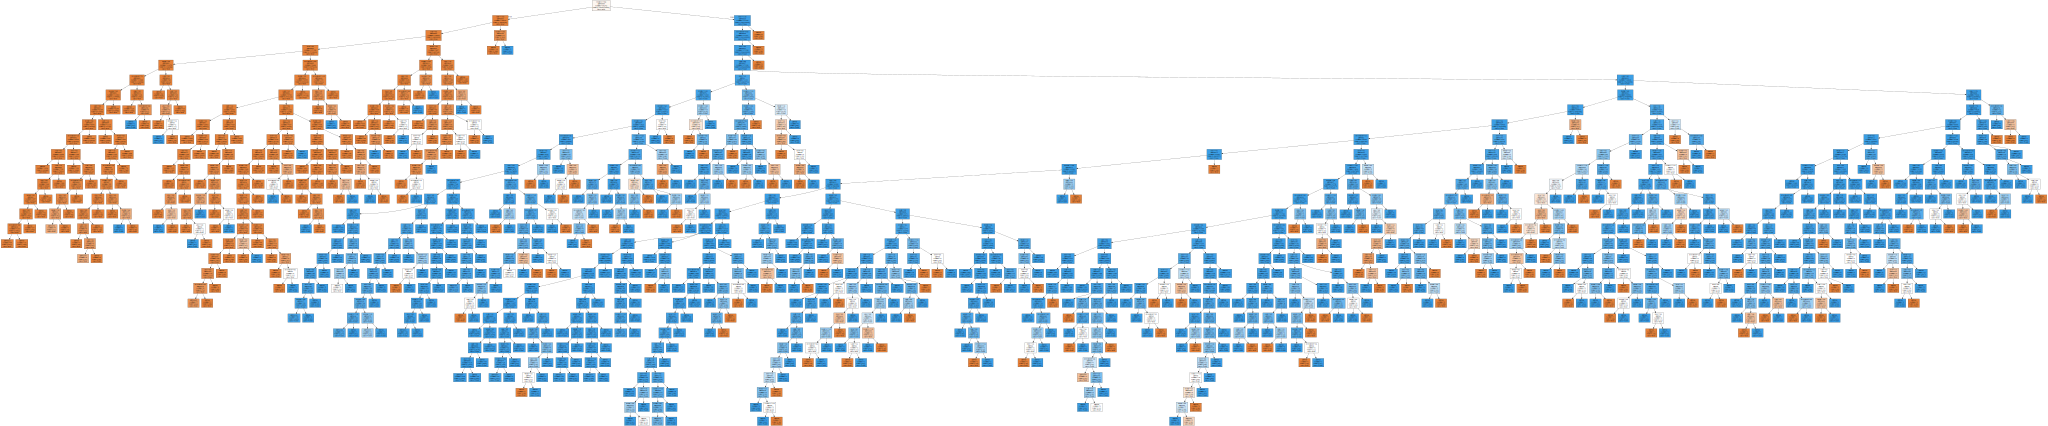

In [36]:
# Vizualizácia stromu - analýza jeho vetvenia
vectorizer = CountVectorizer(max_features = 10, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(df_final.text)
y = df_final.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

features = vectorizer.get_feature_names()

graph = Source(export_graphviz(clf, 
                               out_file=None,
                               feature_names=features,
                               class_names=['true', 'fake'],
                               filled = True))

display(SVG(graph.pipe(format='svg')))

In [43]:
count_vect_model(df_final.text_stem, 0)

Training score: 0.9591663842765165
Accuracy: 0.8208719222950079
Precision: 0.822219
Recall: 0.819983

Feature: one | Score: 0.09130640604459875
Feature: peopl | Score: 0.06235714841321987
Feature: presid | Score: 0.07141073850209495
Feature: republican | Score: 0.05455063951618699
Feature: said | Score: 0.3496582076979571
Feature: say | Score: 0.054717869586654214
Feature: state | Score: 0.0740021259621667
Feature: trump | Score: 0.11946591021244486
Feature: would | Score: 0.06557435062078362
Feature: year | Score: 0.05695660344389285


In [22]:
count_vect_model_2gram(df_final.text_stem, 0)

Training score: 0.8034447534192157
Accuracy: 0.794461468618772
Precision: 0.813979
Recall: 0.798575

Feature: donald trump | Score: 0.06832820656457819
Feature: featur imag | Score: 0.37731597493093
Feature: hillari clinton | Score: 0.041402583642028735
Feature: new york | Score: 0.03800844244480634
Feature: north korea | Score: 0.01472082462419788
Feature: presid donald | Score: 0.051147294676705146
Feature: twitter com | Score: 0.11415894857931518
Feature: unit state | Score: 0.029331962876648916
Feature: washington reuter | Score: 0.24057766955512133
Feature: white hous | Score: 0.02500809210566817


In [23]:
count_vect_model_3gram(df_final.text_stem, 0)

Training score: 0.7193405595596164
Accuracy: 0.7245488593803201
Precision: 0.810412
Recall: 0.733232

Feature: 21st centuri wire | Score: 0.09163172398523872
Feature: black live matter | Score: 0.028853841929267786
Feature: donald trump realdonaldtrump | Score: 0.025335082603211507
Feature: featur imag via | Score: 0.39200421292593884
Feature: new york time | Score: 0.010701658542218839
Feature: pic twitter com | Score: 0.21734122379262813
Feature: presid barack obama | Score: 0.03876591296598145
Feature: presid donald trump | Score: 0.18078785440041428
Feature: reuter presid donald | Score: 0.004714871659797986
Feature: washington reuter presid | Score: 0.009863617195302472


In [45]:
count_vect_model(df_final.text_lemm, 0)

Training score: 0.9522478255958432
Accuracy: 0.792749039981929
Precision: 0.793362
Recall: 0.792032

Feature: make | Score: 0.06535395787091652
Feature: one | Score: 0.09720518714896673
Feature: people | Score: 0.07098966474536962
Feature: president | Score: 0.0763057407359037
Feature: republican | Score: 0.06408009286403904
Feature: say | Score: 0.2768378407220442
Feature: state | Score: 0.08452814848038215
Feature: trump | Score: 0.12554662720031928
Feature: would | Score: 0.07207320362158168
Feature: year | Score: 0.0670795366104771


In [24]:
count_vect_model_2gram(df_final.text_lemm, 0)

Training score: 0.8034447534192157
Accuracy: 0.7948019521053229
Precision: 0.814375
Recall: 0.798919

Feature: donald trump | Score: 0.06791104852768255
Feature: feature image | Score: 0.37730572612981583
Feature: hillary clinton | Score: 0.04149179206034026
Feature: new york | Score: 0.037646932585542
Feature: north korea | Score: 0.014571122483984998
Feature: president donald | Score: 0.05146341480139499
Feature: twitter com | Score: 0.11423039256351808
Feature: united state | Score: 0.02976749634321611
Feature: washington reuters | Score: 0.24063960632572243
Feature: white house | Score: 0.024972468178782726


In [25]:
count_vect_model_3gram(df_final.text_lemm, 0)

Training score: 0.7193405595596164
Accuracy: 0.7243218703892861
Precision: 0.810307
Recall: 0.733013

Feature: 21st century wire | Score: 0.09151162238198529
Feature: black life matter | Score: 0.028807893941094693
Feature: donald trump realdonaldtrump | Score: 0.0253001865317996
Feature: feature image via | Score: 0.3913214536342629
Feature: new york time | Score: 0.01068487938938653
Feature: pic twitter com | Score: 0.21711351755218636
Feature: president barack obama | Score: 0.039173223051583
Feature: president donald trump | Score: 0.1817108768826993
Feature: reuters president donald | Score: 0.004562246168655562
Feature: washington reuters president | Score: 0.009814100466346825


### Title + text

In [47]:
count_vect_model(df_final.title_text, 1)

Training score: 0.9494239240935276
Accuracy: 0.8186130562457646
Precision: 0.820002
Recall: 0.817706

Feature: also | Score: 0.05451138065403556
Feature: new | Score: 0.05491768778377877
Feature: obama | Score: 0.05091244635351833
Feature: one | Score: 0.09207037388698354
Feature: people | Score: 0.06407877643332502
Feature: president | Score: 0.06742358526914259
Feature: said | Score: 0.36089763156328564
Feature: state | Score: 0.053945550758140455
Feature: trump | Score: 0.1312603010016505
Feature: would | Score: 0.06998226629613967


In [26]:
count_vect_model_2gram(df_final.title_text, 1)

Training score: 0.8058566483173486
Accuracy: 0.7938939961411872
Precision: 0.813194
Recall: 0.797987

Feature: donald trump | Score: 0.07231784863767034
Feature: featured image | Score: 0.3702029029216249
Feature: hillary clinton | Score: 0.04222718397990287
Feature: new york | Score: 0.03915521271480073
Feature: north korea | Score: 0.015435384043362766
Feature: president donald | Score: 0.051690778789969395
Feature: twitter com | Score: 0.11347023579729067
Feature: united states | Score: 0.028374152241960562
Feature: washington reuters | Score: 0.2402964320395635
Feature: white house | Score: 0.026829868833854385


In [27]:
count_vect_model_3gram(df_final.title_text, 1)

Training score: 0.7186311787072244
Accuracy: 0.7239813869027352
Precision: 0.810349
Recall: 0.732691

Feature: 21st century wire | Score: 0.09132984203910072
Feature: black lives matter | Score: 0.03045542009654495
Feature: donald trump realdonaldtrump | Score: 0.02552791861501943
Feature: featured image via | Score: 0.3864927486172145
Feature: new york times | Score: 0.011091385947492793
Feature: pic twitter com | Score: 0.21770111690374316
Feature: president barack obama | Score: 0.039850954737158904
Feature: president donald trump | Score: 0.18315421220758274
Feature: reuters president donald | Score: 0.004600173604825706
Feature: washington reuters president | Score: 0.009796227231317102


In [49]:
count_vect_model(df_final.title_text_stem, 0)

Training score: 0.9606065740426973
Accuracy: 0.818161283035916
Precision: 0.819628
Recall: 0.817231

Feature: one | Score: 0.09149196822177859
Feature: peopl | Score: 0.060305733624152494
Feature: presid | Score: 0.0686544834469212
Feature: republican | Score: 0.057743204280531535
Feature: said | Score: 0.3517028507453221
Feature: say | Score: 0.056098101274608216
Feature: state | Score: 0.07194231029399023
Feature: trump | Score: 0.1218737445368395
Feature: would | Score: 0.06405619993928077
Feature: year | Score: 0.0561314036365753


In [28]:
count_vect_model_2gram(df_final.title_text_stem, 0)

Training score: 0.8067079053402191
Accuracy: 0.7942344796277381
Precision: 0.813070
Recall: 0.798279

Feature: donald trump | Score: 0.07184959486128079
Feature: featur imag | Score: 0.3738971379121379
Feature: hillari clinton | Score: 0.04273386713047645
Feature: new york | Score: 0.03856026242397101
Feature: north korea | Score: 0.015016952399854703
Feature: presid donald | Score: 0.05069692644273525
Feature: twitter com | Score: 0.11312337799948911
Feature: unit state | Score: 0.0289206893964975
Feature: washington reuter | Score: 0.23845309220261357
Feature: white hous | Score: 0.02674809923094353


In [29]:
count_vect_model_3gram(df_final.title_text_stem, 0)

Training score: 0.719822938539243
Accuracy: 0.7254568153444558
Precision: 0.811028
Recall: 0.734118

Feature: 21st centuri wire | Score: 0.09142312389542609
Feature: black live matter | Score: 0.030432746196248372
Feature: donald trump realdonaldtrump | Score: 0.025463684537784394
Feature: featur imag via | Score: 0.39112832452691604
Feature: new york time | Score: 0.011026910079914338
Feature: pic twitter com | Score: 0.21685559978586436
Feature: presid barack obama | Score: 0.03874062882054933
Feature: presid donald trump | Score: 0.18035709817704856
Feature: reuter presid donald | Score: 0.004753870764761643
Feature: washington reuter presid | Score: 0.009818013215486912


In [51]:
count_vect_model(df_final.title_text_lemm, 0)

Training score: 0.9554953123235062
Accuracy: 0.7884571944883668
Precision: 0.789744
Recall: 0.787488

Feature: make | Score: 0.0664157399826249
Feature: one | Score: 0.0920421438830901
Feature: people | Score: 0.07495245758340846
Feature: president | Score: 0.07950586897462567
Feature: republican | Score: 0.06511891793592646
Feature: say | Score: 0.27050398739799597
Feature: state | Score: 0.08474973037802198
Feature: trump | Score: 0.13337830111440632
Feature: would | Score: 0.06612788314469387
Feature: year | Score: 0.06720496960520632


In [30]:
count_vect_model_2gram(df_final.title_text_lemm, 0)

Training score: 0.8067079053402191
Accuracy: 0.7946884576098059
Precision: 0.813695
Recall: 0.798748

Feature: donald trump | Score: 0.07155342647562359
Feature: feature image | Score: 0.37386119646046667
Feature: hillary clinton | Score: 0.04215746446112237
Feature: new york | Score: 0.0383272052633957
Feature: north korea | Score: 0.014975175212499107
Feature: president donald | Score: 0.051078663383539905
Feature: twitter com | Score: 0.11319145975691444
Feature: united state | Score: 0.029527343179740404
Feature: washington reuters | Score: 0.23849803217022458
Feature: white house | Score: 0.02683003363647322


In [31]:
count_vect_model_3gram(df_final.title_text_lemm, 0)

Training score: 0.719822938539243
Accuracy: 0.7252298263534218
Precision: 0.810923
Recall: 0.733899

Feature: 21st century wire | Score: 0.09130241221268895
Feature: black life matter | Score: 0.030356773768236367
Feature: donald trump realdonaldtrump | Score: 0.025416610266634897
Feature: feature image via | Score: 0.3904438839354426
Feature: new york time | Score: 0.011049400395556163
Feature: pic twitter com | Score: 0.21662662310150246
Feature: president barack obama | Score: 0.03915317462543112
Feature: president donald trump | Score: 0.18128151895417408
Feature: reuters president donald | Score: 0.004600980997020563
Feature: washington reuters president | Score: 0.009768621743312684


In [49]:
model_data = {'title':[0.7382,0.7488,0.8098,0.7543],'title_stem':[0.7365,0.7470,0.8037,0.7523],'title_lemm':[0.7350,0.7394,
            0.7438,0.7410],'text':[0.9992,0.9885,0.9886,0.9884],'text_stem':[0.9591,0.8195,0.8209,0.8186],'text_lemm':[0.9522,
            0.7916,0.7924,0.7908],'title_text':[0.9494,0.8177,0.8194,0.8167],'title_text_stem':[0.9606,0.8166,0.8180,0.8157],
            'title_text_lemm':[0.9554,0.7896,0.7905,0.7888]}

df = pd.DataFrame(model_data, index =['training_score','accuracy', 'precision', 'recall']) 
df

,title,title_stem,title_lemm,text,text_stem,text_lemm,title_text,title_text_stem,title_text_lemm
training_score,0.7382,0.7365,0.7350,0.9992,0.9591,0.9522,0.9494,0.9606,0.9554
accuracy,0.7488,0.7470,0.7394,0.9885,0.8195,0.7916,0.8177,0.8166,0.7896
precision,0.8098,0.8037,0.7438,0.9886,0.8209,0.7924,0.8194,0.8180,0.7905
recall,0.7543,0.7523,0.7410,0.9884,0.8186,0.7908,0.8167,0.8157,0.7888


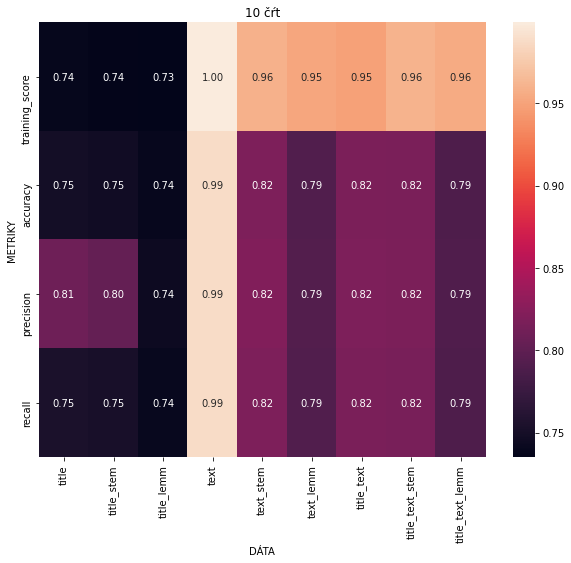

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df, ax=ax, annot=True, fmt=".2f")
plt.xlabel('DÁTA')
plt.ylabel('METRIKY')
ax.set_title('10 čŕt')

In [60]:
model_data_2gram = {'title':[0.5518,0.5486,0.6557,0.5338],'title_stem':[0.5515,0.5487,0.6560,0.5338],'title_lemm':[0.5510,0.5484,
            0.6536,0.5335],'text':[0.8025,0.7943,0.8143,0.7985],'text_stem':[0.8034,0.7945,0.8140,0.7986],'text_lemm':[0.8034,
            0.7948, 0.8144, 0.7989],'title_text':[0.8059,0.7939,0.8132,0.7980],'title_text_stem':[0.8067,0.7942,0.8131,0.7983],
            'title_text_lemm':[0.8067,0.7947,0.8137,0.7988]}

df = pd.DataFrame(model_data_2gram, index =['training_score','accuracy', 'precision', 'recall']) 
df

,title,title_stem,title_lemm,text,text_stem,text_lemm,title_text,title_text_stem,title_text_lemm
training_score,0.5518,0.5515,0.5510,0.8025,0.8034,0.8034,0.8059,0.8067,0.8067
accuracy,0.5486,0.5487,0.5484,0.7943,0.7945,0.7948,0.7939,0.7942,0.7947
precision,0.6557,0.6560,0.6536,0.8143,0.8140,0.8144,0.8132,0.8131,0.8137
recall,0.5338,0.5338,0.5335,0.7985,0.7986,0.7989,0.7980,0.7983,0.7988


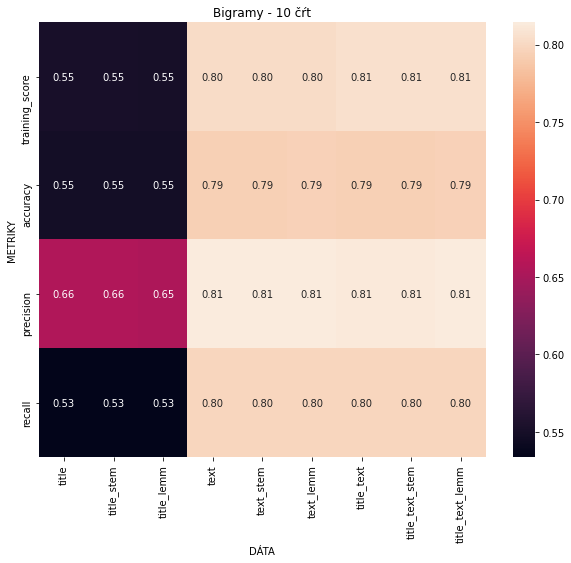

In [61]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df, ax=ax, annot=True, fmt=".2f")
plt.xlabel('DÁTA')
plt.ylabel('METRIKY')
ax.set_title('Bigramy - 10 čŕt')

In [62]:
model_data_3gram = {'title':[0.5266,0.5254,0.7421,0.5088],'title_stem':[0.5266,0.5255,0.7424,0.5089],'title_lemm':[0.5266,0.5255,
            0.7424,0.5089],'text':[0.7181,0.7231,0.8097,0.7318],'text_stem':[0.7193,0.7245,0.8104,0.7332],'text_lemm':[0.7193, 
            0.7243,0.8103,0.7330],'title_text':[0.7186,0.7240,0.8104,0.7327],'title_text_stem':[0.7198,0.7255,0.8110,0.7341],
            'title_text_lemm':[0.7198,0.7252,0.8109,0.7339]}

df = pd.DataFrame(model_data_3gram, index =['training_score','accuracy', 'precision', 'recall']) 
df

,title,title_stem,title_lemm,text,text_stem,text_lemm,title_text,title_text_stem,title_text_lemm
training_score,0.5266,0.5266,0.5266,0.7181,0.7193,0.7193,0.7186,0.7198,0.7198
accuracy,0.5254,0.5255,0.5255,0.7231,0.7245,0.7243,0.7240,0.7255,0.7252
precision,0.7421,0.7424,0.7424,0.8097,0.8104,0.8103,0.8104,0.8110,0.8109
recall,0.5088,0.5089,0.5089,0.7318,0.7332,0.7330,0.7327,0.7341,0.7339


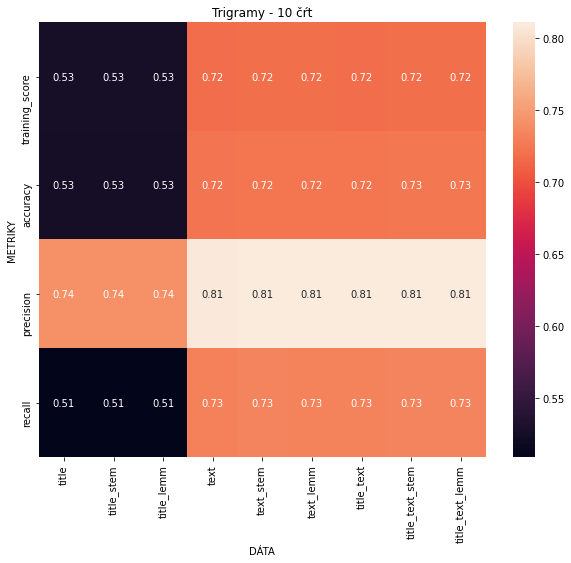

In [63]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df, ax=ax, annot=True, fmt=".2f")
plt.xlabel('DÁTA')
plt.ylabel('METRIKY')
ax.set_title('Trigramy - 10 čŕt')

## Pomocou TfidfVectorizer

In [56]:
def tfidf_vect_model(data, stopword):
    if stopword == 1:
        vectorizer = TfidfVectorizer(max_features = 10, stop_words=stopwords.words('english'))
    elif stopword == 0:
        vectorizer = TfidfVectorizer(max_features = 10)
    
    X = vectorizer.fit_transform(data)
    y = df_final.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    print("Training score:", clf.score(X_train, y_train))
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision: %f" % metrics.precision_score(y_test, y_pred, average="macro"))
    print("Recall: %f\n" % metrics.recall_score(y_test, y_pred, average="macro"))
    
    features = vectorizer.get_feature_names()
    idf = vectorizer.idf_
    for i,w in enumerate(idf):
        print("Feature: " + features[i] + " | Score (TFIDF): " + str(w))

### Title

In [57]:
tfidf_vect_model(df_final.title, 1)

Training score: 0.7363323167287925
Accuracy: 0.739665687824712
Precision: 0.742407
Recall: 0.740865

Feature: clinton | Score (TFIDF): 4.252577200746805
Feature: hillary | Score (TFIDF): 4.015512310913986
Feature: house | Score (TFIDF): 4.123949752076292
Feature: new | Score (TFIDF): 4.234058152979567
Feature: obama | Score (TFIDF): 3.6591599996607433
Feature: says | Score (TFIDF): 3.528941607521149
Feature: trump | Score (TFIDF): 2.140948972571067
Feature: video | Score (TFIDF): 2.735474924498959
Feature: watch | Score (TFIDF): 4.1379142924266645
Feature: white | Score (TFIDF): 4.2888583135283636


In [59]:
tfidf_vect_model(df_final.title_stem, 0)

Training score: 0.7355698633231673
Accuracy: 0.7398915744296363
Precision: 0.743406
Recall: 0.741261

Feature: clinton | Score (TFIDF): 4.232339447314435
Feature: hillari | Score (TFIDF): 4.015512310913986
Feature: hous | Score (TFIDF): 4.095593421782674
Feature: obama | Score (TFIDF): 3.653689350457853
Feature: presid | Score (TFIDF): 4.182650186268056
Feature: republican | Score (TFIDF): 4.188659491431899
Feature: say | Score (TFIDF): 3.3790086320564323
Feature: trump | Score (TFIDF): 2.1394653451838748
Feature: video | Score (TFIDF): 2.725150443010919
Feature: watch | Score (TFIDF): 4.1122059357164575


In [61]:
tfidf_vect_model(df_final.title_lemm, 0)

Training score: 0.7346379758274031
Accuracy: 0.7391009713124012
Precision: 0.743517
Recall: 0.740648

Feature: clinton | Score (TFIDF): 4.232339447314435
Feature: hillary | Score (TFIDF): 4.015512310913986
Feature: house | Score (TFIDF): 4.119337906853729
Feature: new | Score (TFIDF): 4.227770621548526
Feature: obama | Score (TFIDF): 3.6591599996607433
Feature: republican | Score (TFIDF): 4.188659491431899
Feature: say | Score (TFIDF): 3.3327879230301356
Feature: trump | Score (TFIDF): 2.1397477712254327
Feature: video | Score (TFIDF): 2.725150443010919
Feature: watch | Score (TFIDF): 4.1127136788093654


### Text

In [63]:
tfidf_vect_model(df_final.text, 1)

Training score: 0.9992940246244211
Accuracy: 0.9915292523153377
Precision: 0.991538
Recall: 0.991510

Feature: also | Score (TFIDF): 1.8633750842111638
Feature: new | Score (TFIDF): 2.031369428367511
Feature: one | Score (TFIDF): 1.777109427735943
Feature: people | Score (TFIDF): 1.8308600343781618
Feature: president | Score (TFIDF): 1.6296285617301294
Feature: reuters | Score (TFIDF): 1.7135264757800848
Feature: said | Score (TFIDF): 1.298592193882127
Feature: state | Score (TFIDF): 2.1262108294584743
Feature: trump | Score (TFIDF): 1.6934860908536353
Feature: would | Score (TFIDF): 1.6616385318379392


In [65]:
tfidf_vect_model(df_final.text_stem, 0)

Training score: 0.9575849994352197
Accuracy: 0.8169189067088322
Precision: 0.818916
Recall: 0.815849

Feature: one | Score (TFIDF): 1.7587057924489804
Feature: peopl | Score (TFIDF): 1.827960581171583
Feature: presid | Score (TFIDF): 1.6018640990465376
Feature: republican | Score (TFIDF): 2.1854778668700754
Feature: said | Score (TFIDF): 1.298592193882127
Feature: say | Score (TFIDF): 1.7979129980471964
Feature: state | Score (TFIDF): 1.6958843363072797
Feature: trump | Score (TFIDF): 1.6913190471161945
Feature: would | Score (TFIDF): 1.6616385318379392
Feature: year | Score (TFIDF): 1.8122130320312957


In [67]:
tfidf_vect_model(df_final.text_lemm, 0)

Training score: 0.950581723709477
Accuracy: 0.7917325502597696
Precision: 0.792402
Recall: 0.790989

Feature: make | Score (TFIDF): 1.7408716557464539
Feature: one | Score (TFIDF): 1.7587057924489804
Feature: people | Score (TFIDF): 1.827960581171583
Feature: president | Score (TFIDF): 1.624975423046803
Feature: republican | Score (TFIDF): 2.1856996537338094
Feature: say | Score (TFIDF): 1.1786191098993697
Feature: state | Score (TFIDF): 1.6958843363072797
Feature: trump | Score (TFIDF): 1.692627741091193
Feature: would | Score (TFIDF): 1.6616385318379392
Feature: year | Score (TFIDF): 1.8133333091624126


### Title + text

In [69]:
tfidf_vect_model(df_final.title_text, 1)

Training score: 0.9472212809217214
Accuracy: 0.8207589789925458
Precision: 0.822406
Recall: 0.819788

Feature: also | Score (TFIDF): 1.8627325139079298
Feature: new | Score (TFIDF): 2.022914585901672
Feature: obama | Score (TFIDF): 2.464914898502819
Feature: one | Score (TFIDF): 1.7690831525722053
Feature: people | Score (TFIDF): 1.8273920322481403
Feature: president | Score (TFIDF): 1.6255664396124696
Feature: said | Score (TFIDF): 1.2972228517130402
Feature: state | Score (TFIDF): 2.1228723926396795
Feature: trump | Score (TFIDF): 1.679260716907977
Feature: would | Score (TFIDF): 1.6591899079647339


In [71]:
tfidf_vect_model(df_final.title_text_stem, 0)

Training score: 0.9582062577657291
Accuracy: 0.8105940817709509
Precision: 0.812049
Recall: 0.809645

Feature: one | Score (TFIDF): 1.7549500099139097
Feature: peopl | Score (TFIDF): 1.826049472922242
Feature: presid | Score (TFIDF): 1.599022661592128
Feature: republican | Score (TFIDF): 2.1865872934104056
Feature: said | Score (TFIDF): 1.2975574066820208
Feature: say | Score (TFIDF): 1.692131138295497
Feature: state | Score (TFIDF): 1.6939381499906678
Feature: trump | Score (TFIDF): 1.6775244894267491
Feature: would | Score (TFIDF): 1.6605446552493968
Feature: year | Score (TFIDF): 1.8104841594355043


In [73]:
tfidf_vect_model(df_final.title_text_lemm, 0)

Training score: 0.9531514740765842
Accuracy: 0.7880054212785181
Precision: 0.789440
Recall: 0.786991

Feature: make | Score (TFIDF): 1.7239555489614187
Feature: one | Score (TFIDF): 1.7549500099139097
Feature: people | Score (TFIDF): 1.826049472922242
Feature: president | Score (TFIDF): 1.6225727410048958
Feature: republican | Score (TFIDF): 2.186809326494247
Feature: say | Score (TFIDF): 1.1741189069368445
Feature: state | Score (TFIDF): 1.6939381499906678
Feature: trump | Score (TFIDF): 1.6788152429162908
Feature: would | Score (TFIDF): 1.6605446552493968
Feature: year | Score (TFIDF): 1.8116025003410008


In [53]:
tfidf_model_data = {'title':[0.7363,0.7394,0.7421,0.7406],'title_stem':[0.7355,0.7397,0.7432,0.7411],'title_lemm':[0.7346,0.7391,
            0.7435,0.7406],'text':[0.9992,0.9909,0.9910,0.9909],'text_stem':[0.9575,0.8198,0.8218,0.8188],'text_lemm':[0.9505,
            0.7895,0.7902,0.7888],'title_text':[0.9472,0.8215,0.8230,0.8206],'title_text_stem':[0.9582,0.8133,0.8147,0.8123],
            'title_text_lemm':[0.9531,0.7907,0.7920,0.7897]}

df_tfidf = pd.DataFrame(tfidf_model_data, index =['training_score','accuracy', 'precision', 'recall']) 
df_tfidf

,title,title_stem,title_lemm,text,text_stem,text_lemm,title_text,title_text_stem,title_text_lemm
training_score,0.7363,0.7355,0.7346,0.9992,0.9575,0.9505,0.9472,0.9582,0.9531
accuracy,0.7394,0.7397,0.7391,0.9909,0.8198,0.7895,0.8215,0.8133,0.7907
precision,0.7421,0.7432,0.7435,0.9910,0.8218,0.7902,0.8230,0.8147,0.7920
recall,0.7406,0.7411,0.7406,0.9909,0.8188,0.7888,0.8206,0.8123,0.7897


Text(0.5, 1.0, '10 čŕt + TFIDF')

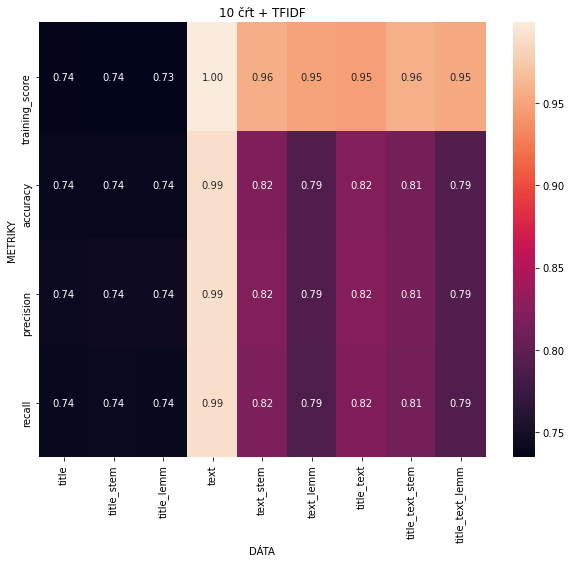

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_tfidf, ax=ax, annot=True, fmt=".2f")
plt.xlabel('DÁTA')
plt.ylabel('METRIKY')
ax.set_title('10 čŕt + TFIDF')